In [1]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [7]:
x1 = np.arange(0,10,1)
x2 = np.linspace(0,5,10)

In [11]:
x = np.arange(0,10,.1)
y = np.cos(x)

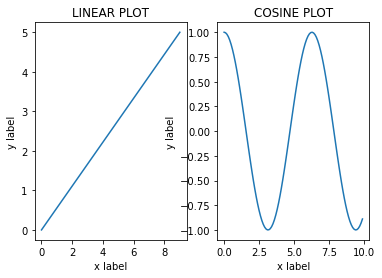

In [12]:
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(x1,x2)
ax1.set_title('LINEAR PLOT')   
ax1.set_xlabel('x label')     
ax1.set_ylabel('y label')   

ax2.plot(x,y)
ax2.set_title('COSINE PLOT')
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')

plt.show()

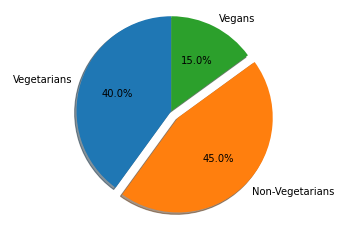

In [3]:
labels = ['Vegetarians', 'Non-Vegetarians', 'Vegans']
sizes = [40, 45, 15]
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [1]:
import re
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data=pd.read_csv('attacks.csv',encoding='latin-1')

### Familiarize with DF

In [1]:
import pandas as pd

In [9]:
df = pd.DataFrame([[1,2,3,5],[15,21,1,5],[3,12,3,1]])

In [10]:
df[df>10]

,0,1,2,3
0,False,False,False,False
1,True,True,False,False
2,False,True,False,False


In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [1309]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [1310]:
#Fix column names with spaces
data.columns=[x.strip() for x in data.columns]

In [1311]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Remove useless/duplicated columns

In [1312]:
#check if values on Unnamed are of any before drop
data[(data['Unnamed: 22'].isnull()==False)|(data['Unnamed: 23'].isnull()==False)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [1313]:
data.drop(['Unnamed: 22','Unnamed: 23'],axis=1,inplace=True)

In [10]:
#Find similar columns
similar=[]
for col1 in data.columns:
    similar.append([data[data[col1]!=data[col2]].count().max() for col2 in data.columns])
corr=pd.DataFrame(similar,columns=data.columns)
corr=corr.set_index(data.columns)
[[x,y] for y in corr.columns for x in corr.columns if x!=y and corr[x][y]<4000]

[['Case Number.1', 'Case Number'],
 ['Case Number.2', 'Case Number'],
 ['href', 'href formula'],
 ['href formula', 'href'],
 ['Case Number', 'Case Number.1'],
 ['Case Number.2', 'Case Number.1'],
 ['Case Number', 'Case Number.2'],
 ['Case Number.1', 'Case Number.2']]

In [1315]:
#Next lines used to compare columns
data[data['href']!=data['href formula']]['href'][50]

'http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf'

In [1316]:
data[data['href']!=data['href formula']]['href formula'][50]

'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf'

In [1317]:
data[data['Case Number']!=data['Case Number.1']]['Case Number.1'][144]

'2017.06.06'

In [1318]:
#Passing values from Case Number.1 and Case Number.2 to Case Number before drop
for x in data[data['Case Number'].isnull()].index:
    data.set_value(x, 'Case Number', data['Case Number.1'].iloc[x])
for x in data[data['Case Number'].isnull()].index:
    data.set_value(x, 'Case Number', data['Case Number.2'].iloc[x])

C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [1319]:
#Passing values from href formula to href before drop
for x in data[data['href'].isnull()].index:
    data.set_value(x, 'href', data['href formula'].iloc[x])

C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [1320]:
data.drop(['href formula','Case Number.1','Case Number.2'],axis=1,inplace=True)

In [1321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 19 columns):
Case Number               8703 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href                      6302 non-null object
original order            6309 non-null floa

### Clean each column

#### Case Number

In [1322]:
[x for x in data['Case Number'].unique() if not re.findall('\d.',str(x))]

['0', nan, 'xx']

In [1323]:
[x for x in data['Case Number'] if re.match('xx',str(x))]

['xx']

In [1324]:
data[data['Case Number']=='0'].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0


In [1325]:
tona=lambda x: np.NaN if not re.findall('\d.',str(x)) else x

In [1326]:
data['Case Number']=data['Case Number'].apply(tona)

In [1327]:
[x for x in data['Case Number'].unique() if not re.findall('\d.',str(x))]

[nan]

#### Date

In [24]:
data.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [25]:
fix_date('1845-1853')

nan

In [19]:
def fix_date(string):
    string=re.sub('[Rr]eported','',str(string)).strip()
    string=re.sub('[ \.]','-',string)
    try:
        string = pd.to_datetime(string)
        return string
    except:
        string=re.sub('[A-Za-z]{4:}','',str(string)).strip()
        try:
            string=pd.to_datetime(string)
        except:
            return np.NaN

In [1329]:
data.Date=data.Date.apply(fix_date)

In [1330]:
[x for x in data.Date.unique() if not re.findall('\d',str(x))]

[numpy.datetime64('NaT')]

#### Year

In [1331]:
[x for x in data.Year.unique() if not re.findall('\d\d',str(x))]

[nan, 5.0, 0.0]

In [1332]:
tona2=lambda x: np.NaN if not re.findall('\d\d.',str(x)) else x

In [1333]:
data.Year=data.Year.apply(tona2)

In [1334]:
[x for x in data.Year.unique() if not re.findall('\d\d',str(x))]

[nan]

#### Type

In [1335]:
[x for x in data.Type.unique()]

['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan,
 'Boat',
 'Boatomg']

#### Country

In [1336]:
[re.sub('\?','',str(x)).strip() for x in data.Country.unique()]

['USA',
 'AUSTRALIA',
 'MEXICO',
 'BRAZIL',
 'ENGLAND',
 'SOUTH AFRICA',
 'THAILAND',
 'COSTA RICA',
 'MALDIVES',
 'BAHAMAS',
 'NEW CALEDONIA',
 'ECUADOR',
 'MALAYSIA',
 'LIBYA',
 'nan',
 'CUBA',
 'MAURITIUS',
 'NEW ZEALAND',
 'SPAIN',
 'SAMOA',
 'SOLOMON ISLANDS',
 'JAPAN',
 'EGYPT',
 'ST HELENA, British overseas territory',
 'COMOROS',
 'REUNION',
 'FRENCH POLYNESIA',
 'UNITED KINGDOM',
 'UNITED ARAB EMIRATES',
 'PHILIPPINES',
 'INDONESIA',
 'CHINA',
 'COLUMBIA',
 'CAPE VERDE',
 'Fiji',
 'DOMINICAN REPUBLIC',
 'CAYMAN ISLANDS',
 'ARUBA',
 'MOZAMBIQUE',
 'FIJI',
 'PUERTO RICO',
 'ITALY',
 'ATLANTIC OCEAN',
 'GREECE',
 'ST. MARTIN',
 'FRANCE',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'JAMAICA',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'CANADA',
 'CROATIA',
 'SAUDI ARABIA',
 'CHILE',
 'ANTIGUA',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'UNITED ARAB EMIRATES (UAE)',
 'AZORES',

In [1337]:
data.Country=data.Country.apply(lambda x:np.NaN if re.fullmatch('nan',str(x)) else re.sub('\?','',str(x)).strip())

#### Area

In [1338]:
[re.sub('d\x92','',str(x)).strip() for x in data.Area.unique()]

['California',
 'Georgia',
 'Hawaii',
 'New South Wales',
 'Colima',
 'Pernambuco',
 'Florida',
 'Queensland',
 'South Carolina',
 'Cornwall',
 'Westerm Australia',
 'Eastern Cape Province',
 'Hua Hin',
 'Cocos Island',
 'Western Australia',
 'Alifu Alifu Atoll',
 'Western Cape Province',
 'New Providence',
 'Alagoas',
 'nan',
 'Victoria',
 'KwaZulu-Natal',
 'Boi Island, Victoria',
 'Galapagos Islands',
 'Fernando de Noronha',
 'Sepang',
 'Holquin Province',
 'Pamplemousses',
 'South Australia',
 'North Island',
 'New York',
 'Canary Islands',
 'Upolu Island',
 'Shizuoka Prefecture',
 'Texas',
 'Castellón',
 'Massachusetts',
 'Red Sea Protectorate',
 'New Providence District',
 '40 miles off Grand Bahama Island',
 'Ascension Island',
 'New Jersey',
 'Majorca',
 'Washington',
 'Tabasco',
 'Anjouan',
 'Ibiza Island',
 'Marquesas',
 'South Devon',
 'New Providence',
 'Sharjah,',
 'Baja California Sur',
 'Saint-Leu',
 'South Island',
 'Luzon Island',
 'Great Exuma',
 'Saint-Andre',
 'Bimin

In [1339]:
data.Area=data.Area.apply(lambda x:np.NaN if re.fullmatch('nan',str(x)) else re.sub('d\x92','',str(x)).strip())

#### Location

In [1340]:
[str(x).strip() for x in data.Location.unique()]

['Oceanside, San Diego County',
 'St. Simon Island, Glynn County',
 'Habush, Oahu',
 'Arrawarra Headland',
 'La Ticla',
 'Flat Rock, Ballina',
 'Piedade Beach, Recife',
 'Lighhouse Point Park, Ponce Inlet, Volusia County',
 'Cocoa Beach, Brevard  County',
 'Daytona Beach, Volusia County',
 'Cairns Aquarium',
 'Isle of Palms,  Charleston County',
 'Hilton Head Island, Beaufort County',
 "Off Land's End",
 'Dugong Bay',
 'Nahoon Beach, East London',
 'Sharpes Beach, Ballina',
 'Sai Noi Beach',
 'Manuelita',
 'Gearys Beach',
 'Lennox Head',
 'Surfers Point, Prevelly',
 'South Point, Gracetown',
 'Madoogali',
 'Robberg Beach, Plettenberg Bay',
 'Shipwreck\x92s Beach, Keoneloa Bay, Kauai',
 'Piedade',
 'Lefthanders, Margaret River Area',
 'Cobblestones, Margaret River Area',
 'Nirvana Beach',
 'Praia de Sauaçuhy, Maceió',
 'Magenta Beach, Noumea',
 'Bimini',
 'St. Francis Bay',
 'Kukio Beach',
 "Waterman's Bay",
 'Lorne',
 'Winkipop',
 'Durban',
 'Little Congwong Beach, La Perouse',
 'Weste

In [1341]:
data.Location=data.Location.apply(lambda x:np.NaN if re.fullmatch('nan',str(x)) else str(x).strip())

#### Activity

In [28]:
def group_act(x):
    activities=['Paddling', 'Playing', 'Standing', 'Surf', 'Diving', 'Swimming', 'Fishing', 'Walking', 
                'Feeding', 'Float', 'Boarding', 'Paddleboarding', 'Wading', 'Kayak', 'Snorkel']
    if re.fullmatch('nan',str(x)):
        return x
    else:
        for y in activities:
            if re.findall(y.lower(),str(x).lower()):
                return re.sub(str(x),str(y),re.sub('[\(\)\?]','',str(x)))
        return 'Other'

In [29]:
#Categorize into common activities
data.Activity=data.Activity.apply(group_act)

In [30]:
[x for x in data.Activity.unique()]

['Paddling',
 'Standing',
 'Surf',
 'Diving',
 'Swimming',
 'Fishing',
 'Walking',
 'Feeding',
 'Boarding',
 'Other',
 'Wading',
 'Snorkel',
 nan,
 'Kayak',
 'Float',
 'Playing']

In [31]:
data.Activity.value_counts()

Surf        1239
Swimming    1099
Fishing     1082
Other       1074
Diving       550
Wading       161
Standing     147
Boarding     145
Snorkel       93
Float         50
Kayak         36
Playing       25
Paddling      22
Walking       20
Feeding       15
Name: Activity, dtype: int64

#### Name

In [34]:
data.Name.unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'John Denges', ...,
       'A "chiefess"', 'Ahmun', 'Jules Patterson'], dtype=object)

In [35]:
#Regex lab nombres porpios
propios="[A-Z][a-z]*(?:\s[A-Z][a-z]*)*"

In [36]:
len([x for x in data.Name.unique() if re.findall(propios,str(x))])

5010

In [37]:
len([re.sub('\xa0',' ',str(x)).strip() for x in data.Name.unique() 
 if re.findall(propios,str(x)) and not 
 re.match(propios,re.sub('\xa0',' ',str(x)).strip()) and not re.findall('[oO]ccupant',str(x))])

159

In [38]:
propios="[A-Z][A-Za-záéíóú]+\.?(?:[\s-]?(?:d[aeiou] )?[A-Z][A-Za-záéíóú]*\.?)*"
bien=[re.findall(propios,re.sub('\xa0',' ',re.sub('Occupant','',str(x)))) 
 for x in data.Name.unique() if re.findall(propios,re.sub('\xa0',' ',re.sub('Occupant','',str(x))))]

In [1349]:
bien[:32]

[['Julie Wolfe'],
 ['Adyson McNeely'],
 ['John Denges'],
 ['Gustavo Ramos'],
 ['Chris'],
 ['Jose Ernesto da Silva'],
 ['Cody High'],
 ['Trey de Boer'],
 ['Jei Turrell'],
 ['Max Berryman'],
 ['Melisa Brunning'],
 ['Adam Murray'],
 ['Matthew Lee'],
 ['Rob Bruce'],
 ['Nathan Burch'],
 ['Ahmed Rasheed'],
 ['Dylan McWilliams'],
 ['Werner Danielsen'],
 ['Pablo de Melo'],
 ['Jason Longrass'],
 ['Alejandro Travaglini'],
 ['Bruce Rowan'],
 ['Josias Paz'],
 ['Shane McConnell'],
 ['Ross Spowart'],
 ['Luke Guy', 'Finn Bald'],
 ['Rob Crossland'],
 ['Lachie Brown'],
 ['Elton Polly'],
 ['Anna Shurapey'],
 ['Brett Palmer'],
 ['Adam Hoare']]

In [1350]:
def fun_propios(x):
    propios="[A-Z][A-Za-záéíóú]+\.?(?:[\s-]?(?:d[aeiou]s? )?[A-Z][A-Za-záéíóú]*\.?)*"
    if re.fullmatch('nan',str(x)):
        return x
    else:
        if re.findall(propios,re.sub('\xa0',' ',re.sub('Occupant','',str(x)))):
            return re.findall(propios,re.sub('\xa0',' ',re.sub('Occupant','',str(x))))
        else:
            return np.NaN
def strings(x):
    if type(fun_propios(x))!=list:
        return fun_propios(x)
    else:
        if len(fun_propios(x))==1:
            return fun_propios(x)[0]
        else:
            return fun_propios(x)

In [1351]:
data.Name=data.Name.apply(strings)

#### Sex

In [1352]:
[x for x in data.Sex.unique()]

['F', 'M', nan, 'M ', 'lli', 'N', '.']

In [1353]:
data.Sex=data.Sex.apply(lambda x: x if (x=='F'or x=='M') else np.NaN)

In [1354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 19 columns):
Case Number               6302 non-null object
Date                      5997 non-null datetime64[ns]
Year                      6174 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href                      6302 non-null object
original order            6309 non-n

#### Age

In [1355]:
data[data.Age=='9 & 12']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
3459,1968.08.24,1968-08-24,1968.0,Unprovoked,USA,Florida,Half mile north of Juno Beach Pier,Playing,"[Colleen Chamberlin, Scott Chamberlin]",NaN,9 & 12,"Shark bumped Colleen, the nudged Scott, then b...",N,16h00,a small hammerhead shark,"M. Vorenberg, GSAF",1968.08.24-Chamberlin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2844.0


In [1356]:
[age(x) for x in data.Age.unique() if re.findall('\d',str(x)) and re.findall('month',str(x).lower())]

[['1'], ['1'], ['1']]

In [1357]:
[age(x) for x in data.Age.unique() if re.findall('\d',str(x)) and re.findall('or|to',str(x).lower())]

[['18'],
 ['12'],
 ['8'],
 ['30'],
 ['33'],
 ['16'],
 ['21'],
 ['18'],
 ['25'],
 ['25'],
 ['13'],
 ['1'],
 ['7'],
 ['9'],
 ['10'],
 ['31'],
 ['13']]

In [1358]:
[x for x in data.Age.unique() if re.findall('\d',str(x)) and re.findall('-',str(x).lower())]

['mid-30s', 'mid-20s']

In [40]:
#Check if it is baby
baby=lambda x: '1' if re.findall('month',str(x).lower()) else x
#Check if it has two posible ages
one_age=lambda x: re.findall('\d+',baby(x))[0] if re.findall('or|to',str(x).lower()) else baby(x)
#Return list of ages
age=lambda x: re.findall('\d+',one_age(x)) if re.findall('\d',str(x)) else np.NaN
def ages(x):
    if type(age(x))!=list:
        return age(x)
    else:
        if len(age(x))==1:
            return int(age(x)[0])
        else:
            return [int(x) for x in age(x)]

In [41]:
data.Age=data.Age.apply(ages)

#### Injury

In [1361]:
[x for x in data.Injury.unique() if re.findall('fatal',str(x).lower())]

['FATAL',
 'FATAL, but death was probably due to drowning',
 'Fatal, coroner unable to determine if the diver was alive or had drowned when incident took place.',
 'Fatal',
 'FATAL, but shark involvement prior to death unconfirmed',
 'FATAL, arm bitten by shark hauled on deck             PROVOKED INCIDENT',
 'Thigh bitten, FATAL',
 'Torso & righ arm bitten FATAL',
 'FATAL    Severe bite to right thigh',
 'Leg bitten, FATAL',
 'FATAL        Only 4 of the 18 on board were rescued, some of the missing were allegedly killed by sharks',
 'FATAL,  beaten & thrown overboard by smugglers, they  were killed by sharks',
 'Presumed FATAL, body not recovered',
 'Left thigh bitten FATAL',
 'Reportedly FATAL but few details',
 'Severe bite to right leg FATAL',
 'FATAL PROVOKED INCIDENT',
 'FATAL, shark involvement prior to death is unconfirmed',
 'FATAL, leg bitten',
 'FATAL, abdomen, pelvis & leg bitten      ',
 'FATAL, leg severed ',
 'FATAL Severe wound to right thigh & calf',
 'FATAL, right thig

In [1362]:
#fill 'Fatal (Y/N) where injury gives info'
non_fatal=[x for x in data.Injury.unique() if re.findall('non-fatal',str(x).lower()) or 
           re.findall('(?:no|minor) injury',str(x).lower())]
non_fatal_index=[x for x in data[data.Injury.apply(lambda x:1 if x in non_fatal else 0)==1].index]
fatal_injury=[x for x in data.Injury.unique() if re.findall('fatal',str(x).lower()) and not x in non_fatal]
fatal_index=[x for x in data[data.Injury.apply(lambda x:1 if x in fatal_injury else 0)==1].index]

In [1363]:
for x in non_fatal_index:
    data.set_value(x,'Fatal (Y/N)','N')
for x in fatal_index:
    data.set_value(x,'Fatal (Y/N)','Y')

C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [1364]:
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [1365]:
quest_inc=[x for x in data.Injury.unique() if re.search('incident',str(x).lower()) 
           and re.search('doubtful|questionable',str(x).lower())]
quest_index=[x for x in data[data.Injury.apply(lambda x:1 if x in quest_inc else 0)==1].index]
provoked_inc=[x for x in data.Injury.unique() if re.search('provoked incident',str(x).lower()) and not x in quest_inc]
provoked_index=[x for x in data[data.Injury.apply(lambda x:1 if x in provoked_inc else 0)==1].index]

In [1366]:
for x in quest_index:
    data.set_value(x,'Type','Questionable')
for x in provoked_index:
    data.set_value(x,'Type','Provoked')

C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


#### Fatal (Y/N)

In [1367]:
[x for x in data['Fatal (Y/N)'].unique()]

['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ']

In [1368]:
data['Fatal (Y/N)']=data['Fatal (Y/N)'].apply(lambda x:'N' if re.findall('N',str(x)) else 'Y' if re.findall('Y',str(x)) else np.NaN)

#### Time

In [1369]:
[x for x in data.Time.unique() if re.findall('\dh',re.sub('j','h',str(x)).replace(':','h'))]

['18h00',
 '14h00  -15h00',
 '07h45',
 '17h00',
 '14h00',
 '15h00',
 '08h15',
 '11h00',
 '10h30',
 '10h40',
 '16h50',
 '07h00',
 '09h30',
 '21h50',
 '09h40',
 '08h00',
 '17h35',
 '15h30',
 '07h30',
 '19h00, Dusk',
 '16h00',
 '15h01',
 '12h00',
 '13h45',
 '23h30',
 '09h00',
 '14h30',
 '18h30',
 '12h30',
 '16h30',
 '18h45',
 '06h00',
 '10h00',
 '10h44',
 '13h19',
 '13h30',
 '10h45',
 '11h20',
 '11h45',
 '19h30',
 '08h30',
 '15h45',
 'Shortly before 12h00',
 '17h34',
 '17h10',
 '11h15',
 '08h50',
 '17h45',
 '13h00',
 '10h20',
 '13h20',
 '02h00',
 '09h50',
 '11h30',
 '17h30',
 '9h00',
 '10h43',
 '15h15',
 '15h40',
 '19h05',
 '14h30 / 15h30',
 '22h00',
 '16h20',
 '14h34',
 '15h25',
 '14h55',
 '17h46',
 '15h49',
 '19h00',
 '09h30 / 10h00',
 '10h15',
 '18h15',
 '04h00',
 '14h50',
 '13h50',
 '19h20',
 '10h25',
 '10h45-11h15',
 '16h45',
 '15h52',
 '06h15',
 '14h40',
 '19h45',
 '10h10',
 '08h45',
 '12h10',
 '18h05',
 '11h41',
 '12h25',
 '17h51',
 '16h12',
 '12h45',
 '10h50',
 '14h15',
 '09h45',


In [1370]:
def error_dedo(x):
    if type(x)!=str:
        return x
    else:
        x=re.sub('j','h',x)
        x=re.sub(':','h',x)
        if re.fullmatch('\d{4}',x):
            x=x[:2]+'h'+x[2:]
        if re.findall('\d\dh\d\d',x):
            return re.findall('\d\dh\d\d',x)[0]
        else:
            return np.NaN

In [1371]:
data.Time=data.Time.apply(error_dedo)

#### Species

In [1372]:
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [1373]:
quest_att=[x for x in data.Species.unique() if re.search('questionable',str(x).lower()) 
           and (re.search('incident|involvement',str(x).lower()) or re.fullmatch('questionable',str(x).lower()))]
quest_att_index=[x for x in data[data.Species.apply(lambda x:1 if x in quest_att else 0)==1].index]
#invalid_att=[x for x in data.Species.unique() if re.findall('invalid',str(x).lower())]
#invalid_index=[x for x in data[data.Species.apply(lambda x:1 if x in invalid_att else 0)==1].index]

In [1374]:
(data.iloc[invalid_index].Type!='Invalid').sum()

0

In [1375]:
for x in quest_att_index:
    data.set_value(x,'Type','Questionable')

C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [1376]:
filtro=[x for y in species for x in data.Species.unique() if re.findall(y.lower(),str(x).lower())]

In [1377]:
def shark_species(x):
    species=['White','Tiger','Lemon','Bull','Pointer','Reef','Nurse','Wobbegong','Blacktip','Cookiecutter',
             'Blue','Hammerhead','Mako','Bronze whaler','Angel','Spinner','Cow','Silky','Goblin','Raggedtooth']
    if type(x)!=str:
        return x
    else:
        for y in species:
            if re.findall(y.lower(),x.lower()):
                return y
        return np.NaN

In [1378]:
data.Species=data.Species.apply(shark_species)

#### PDF

In [1379]:
def count_double(i):
    if re.findall(str(data.iloc[i].pdf),str(data.iloc[i].href)):
        return 1
    return 0

In [1380]:
#Max diff values
25723-sum(list(map(count_double,range(25723))))

33

In [1381]:
data.drop('pdf', axis=1,inplace=True)

In [1382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 18 columns):
Case Number               6302 non-null object
Date                      5997 non-null datetime64[ns]
Year                      6174 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5906 non-null object
Time                      2374 non-null object
Species                   1761 non-null object
Investigator or Source    6285 non-null object
href                      6302 non-null object
original order            6309 non-null float64
dtypes: datetime64[ns](1), float64(

#### href

In [1383]:
[x for x in data.href.unique() if not re.findall('http',str(x))]

['pdf_directory2014.01.04-Riano.pdf ', nan]

In [1384]:
[x for x in data.href.unique() if str(x).strip()=='pdf_directory2014.01.04-Riano.pdf']

['pdf_directory2014.01.04-Riano.pdf ']

In [1385]:
broken=lambda x: 'http://sharkattackfile.net/spreadsheets/pdf_directory/2014.01.04-Rianto.pdf' if str(x).strip()=='pdf_directory2014.01.04-Riano.pdf' else x

In [1386]:
data.href=data.href.apply(broken)

#### Original Order

In [1387]:
#Useless columns
data['original order'].head()

0    6303.0
1    6302.0
2    6301.0
3    6300.0
4    6299.0
Name: original order, dtype: float64

In [1388]:
data.drop('original order',axis=1,inplace=True)

In [1389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 17 columns):
Case Number               6302 non-null object
Date                      5997 non-null datetime64[ns]
Year                      6174 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5906 non-null object
Time                      2374 non-null object
Species                   1761 non-null object
Investigator or Source    6285 non-null object
href                      6302 non-null object
dtypes: datetime64[ns](1), float64(1), object(15)
memory usage: 3.3+ MB


In [1390]:
data.shape

(25723, 17)

In [1391]:
#Empty rows
data[data[[x for x in data.columns]].isnull().sum(axis=1)==data.shape[1]].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
6302,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1392]:
data.drop(data[data[[x for x in data.columns]].isnull().sum(axis=1)==data.shape[1]].index,inplace=True)

In [1393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 17 columns):
Case Number               6302 non-null object
Date                      5997 non-null datetime64[ns]
Year                      6174 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5906 non-null object
Time                      2374 non-null object
Species                   1761 non-null object
Investigator or Source    6285 non-null object
href                      6302 non-null object
dtypes: datetime64[ns](1), float64(1), object(15)
memory usage: 886.2+ KB


In [1394]:
#check columns with more nulls
#Species and time may be droppable
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)

Species                   0.720565
Time                      0.623294
Age                       0.453983
Name                      0.202475
Sex                       0.090606
Activity                  0.086322
Location                  0.085687
Area                      0.072199
Fatal (Y/N)               0.062837
Date                      0.048397
Year                      0.020311
Country                   0.007934
Injury                    0.004443
Investigator or Source    0.002698
Type                      0.000635
href                      0.000000
Case Number               0.000000
dtype: float64

In [1395]:
data.columns=['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
              'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
              'Species', 'Investigator or Source', 'Pdf']

In [1396]:
data[['Date','Year','Time']].head()

,Date,Year,Time
0,2018-06-25,2018.0,18h00
1,2018-06-18,2018.0,14h00
2,2018-06-09,2018.0,07h45
3,2018-06-08,2018.0,NaN
4,2018-06-04,2018.0,NaN


In [1397]:
#Year can be obtained from date
data.drop('Year',axis=1,inplace=True)

In [1398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
Case Number               6302 non-null object
Date                      5997 non-null datetime64[ns]
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Injury                    6274 non-null object
Fatal                     5906 non-null object
Time                      2374 non-null object
Species                   1761 non-null object
Investigator or Source    6285 non-null object
Pdf                       6302 non-null object
dtypes: datetime64[ns](1), object(15)
memory usage: 837.0+ KB


In [1399]:
data[['Country','Area','Location']].head()

,Country,Area,Location
0,USA,California,"Oceanside, San Diego County"
1,USA,Georgia,"St. Simon Island, Glynn County"
2,USA,Hawaii,"Habush, Oahu"
3,AUSTRALIA,New South Wales,Arrawarra Headland
4,MEXICO,Colima,La Ticla


In [1400]:
data[['Injury','Fatal']].head()

,Injury,Fatal
0,"No injury to occupant, outrigger canoe and pad...",N
1,Minor injury to left thigh,N
2,Injury to left lower leg from surfboard skeg,N
3,Minor injury to lower leg,N
4,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [1401]:
data=data[['Case Number', 'Investigator or Source', 'Date', 'Time', 'Country', 'Area', 'Location',
           'Name', 'Sex', 'Age', 'Activity', 'Type', 'Species', 'Injury', 'Fatal', 'Pdf']]

In [1402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
Case Number               6302 non-null object
Investigator or Source    6285 non-null object
Date                      5997 non-null datetime64[ns]
Time                      2374 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Activity                  5758 non-null object
Type                      6298 non-null object
Species                   1761 non-null object
Injury                    6274 non-null object
Fatal                     5906 non-null object
Pdf                       6302 non-null object
dtypes: datetime64[ns](1), object(15)
memory usage: 837.0+ KB


In [1403]:
#Add time to date
index=[i for i in data.index if not data.Date.isnull()[i] and not data.Time.isnull()[i]]

In [1404]:
pd.to_datetime(re.sub('\d{2}:\d{2}:',data.iloc[2].Time[:2]+':'+data.iloc[2].Time[3:]+':',
                                                  str(data.iloc[2].Date)))

Timestamp('2018-06-09 07:45:00')

In [1405]:
for i in index:
    try:
        data.set_value(i,'Date',pd.to_datetime(re.sub('\d{2}:\d{2}:',data.iloc[i].Time[:2]+':'+data.iloc[i].Time[3:]+':',
                                                  str(data.iloc[i].Date))))
    except:
        print(i)

C:\Users\Usuario_Asignado\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [1406]:
data.Date.head()

0   2018-06-25 18:00:00
1   2018-06-18 14:00:00
2   2018-06-09 07:45:00
3   2018-06-08 00:00:00
4   2018-06-04 00:00:00
Name: Date, dtype: datetime64[ns]

In [1407]:
data.drop('Time',axis=1,inplace=True)

In [1408]:
#Age type is object becaus some entries are list of ages 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 15 columns):
Case Number               6302 non-null object
Investigator or Source    6285 non-null object
Date                      5997 non-null datetime64[ns]
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Activity                  5758 non-null object
Type                      6298 non-null object
Species                   1761 non-null object
Injury                    6274 non-null object
Fatal                     5906 non-null object
Pdf                       6302 non-null object
dtypes: datetime64[ns](1), object(14)
memory usage: 947.8+ KB


In [1410]:
dummies=pd.get_dummies(data[['Sex','Activity','Type','Species','Fatal']])

In [1415]:
data=pd.concat([data,dummies],axis=1)

In [1417]:
#Drop Sex,Activity,Type,Species,Fatal??
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 62 columns):
Case Number               6302 non-null object
Investigator or Source    6285 non-null object
Date                      5997 non-null datetime64[ns]
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Name                      5026 non-null object
Sex                       5731 non-null object
Age                       3441 non-null object
Activity                  5758 non-null object
Type                      6298 non-null object
Species                   1761 non-null object
Injury                    6274 non-null object
Fatal                     5906 non-null object
Pdf                       6302 non-null object
Sex_F                     6302 non-null uint8
Sex_M                     6302 non-null uint8
Activity_Boarding         6302 non-null uint8
Activity_Diving           6302 non-null ui

In [1420]:
data.to_csv('clean_attacks.csv',index=False)